## 탐색적 데이터 분석

### 관련 라이브러리 호출

In [1]:
# 관련 라이브러리를 호출합니다.
import os
import joblib
import numpy as np
import pandas as pd

In [2]:
# 시각화 관련 라이브러리를 호출합니다.
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 실수를 출력할 소수점 자릿수를 설정합니다.
%precision 3
pd.set_option('display.float_format', lambda x: f'{x:.3f}')

### 그래픽 파라미터 설정

In [4]:
# 한글폰트와 글자 크기를 설정합니다.
plt.rc(group = 'font', family = 'Gowun Dodum', size = 10)

In [5]:
# 그래프 크기와 해상도를 설정합니다.
plt.rc(group = 'figure', figsize = (4, 4), dpi = 150)

In [6]:
# 축에 유니코드 마이너스를 출력하지 않도록 설정합니다.
plt.rc(group = 'axes', unicode_minus = False)

In [7]:
# 범례에 채우기 색과 테두리 색을 추가합니다.
plt.rc(group = 'legend', frameon = True, fc = '1', ec = '0')

### 시각화 설정 모듈 호출

In [8]:
# 시각화 설정 모듈을 호출합니다.
from GraphicSetting import *

### EDA 시각화 및 통계 분석 모듈 호출

In [9]:
# EDA 시각화 및 통계 분석 관련 모듈을 호출합니다.
import hds_stats as hds

### 작업 경로 확인 및 변경

In [10]:
# 현재 작업 경로를 확인합니다.
os.getcwd()

'/Users/hdsceokevin/Documents/Lectures/PythonDataAnalysis2/code'

In [11]:
# data 폴더로 작업 경로를 변경합니다.
os.chdir(path = '../data')

In [12]:
# 현재 작업 경로에 있는 폴더명과 파일명을 출력합니다.
sorted(os.listdir())

['APT_Price_GangNam_2020.xlsx',
 'KBO_Hitter_2022.z',
 'Seafood_Trade_Prep.z',
 'Used_Cars_Price.csv',
 'Used_Cars_Price.xlsx',
 'Used_Cars_Price.z',
 'Used_Cars_Price_Prep.z']

### 실습 데이터셋 준비

In [13]:
# xlsx 파일을 읽고 데이터프레임 df를 생성합니다.
df = pd.read_excel(io = 'Used_Cars_Price.xlsx')

In [14]:
# df의 열별 자료형을 출력합니다.
df.dtypes

Price         int64
Age           int64
KM            int64
FuelType     object
HP            int64
MetColor      int64
Automatic     int64
CC            int64
Doors         int64
Weight        int64
dtype: object

In [15]:
# z 파일을 읽고 데이터프레임 df를 생성합니다.
df = joblib.load(filename = 'Used_Cars_Price.z')

In [16]:
# df의 열별 자료형을 출력합니다.
df.dtypes

Price         int64
Age           int64
KM            int64
FuelType     object
HP            int64
MetColor     object
Automatic    object
CC            int64
Doors         int64
Weight        int64
dtype: object

### 목표변수 분포 확인

In [17]:
# 목표변수의 최솟값과 최댓값을 확인합니다.
df['Price'].describe()[['min', 'max']]

min    4350.000
max   15950.000
Name: Price, dtype: float64

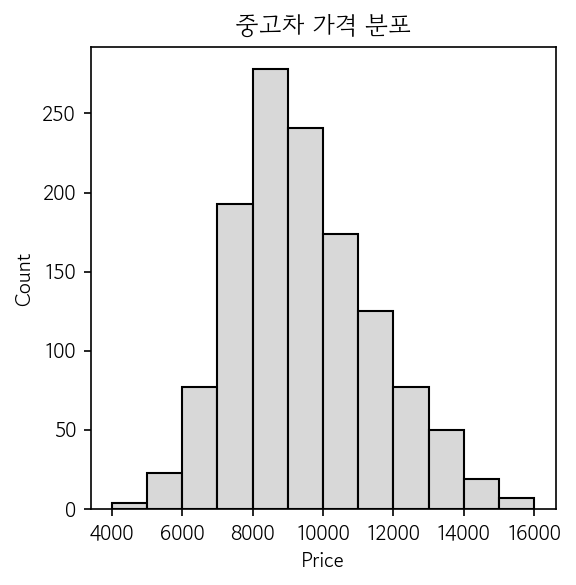

In [18]:
# 히스토그램을 그립니다.
sns.histplot(data = df, x = 'Price', binwidth = 1000, 
             binrange = (4000, 16000), color = '0.8')
plt.title(label = '중고차 가격 분포');

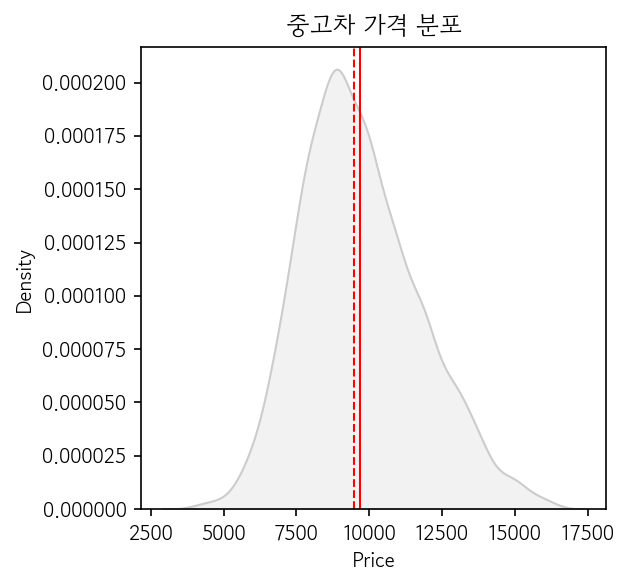

In [19]:
# 커널 밀도 추정 곡선을 그립니다.
sns.kdeplot(data = df, x = 'Price', color = '0.8', fill = True)
plt.axvline(x = df['Price'].mean(), color = 'red', lw = 1, ls = '-')
plt.axvline(x = df['Price'].median(), color = 'red', lw = 1, ls = '--')
plt.title(label = '중고차 가격 분포');

### 연속형 입력변수와 관계 파악

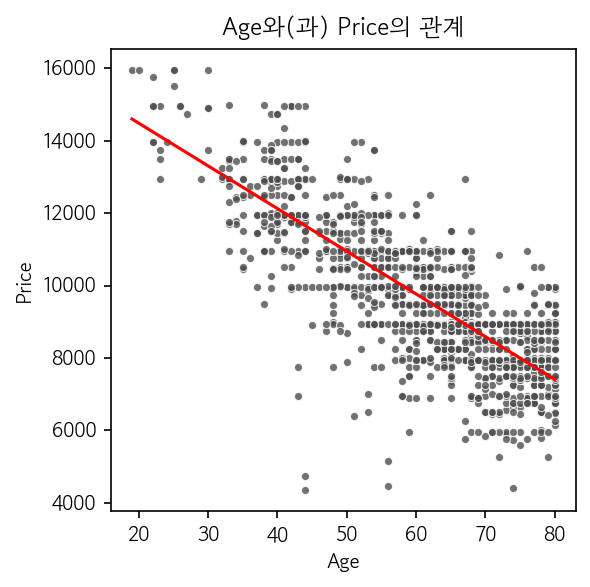

In [20]:
# Age와 Price의 산점도를 그립니다.
hds.plot.regline(data = df, x = 'Age', y = 'Price')

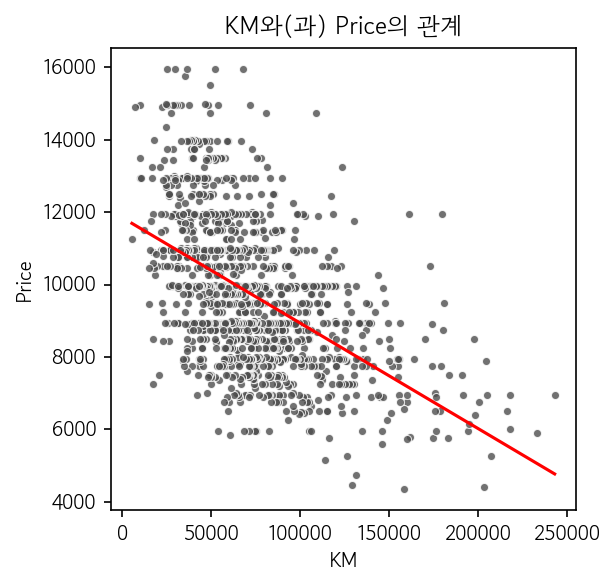

In [21]:
# KM와 Price의 산점도를 그립니다.
hds.plot.regline(data = df, x = 'KM', y = 'Price')

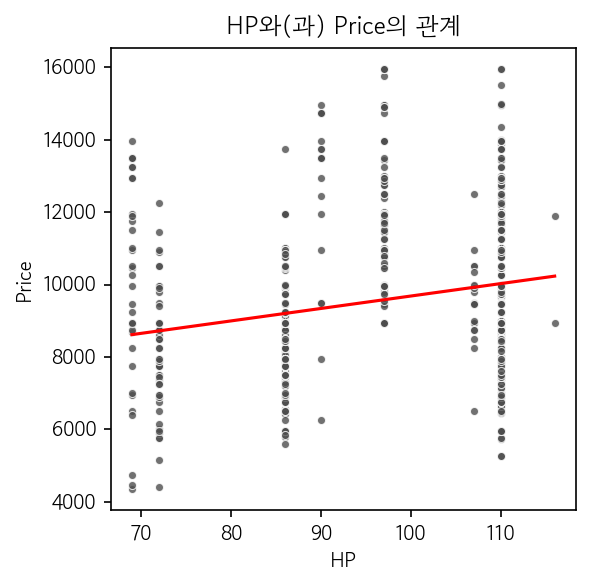

In [22]:
# HP와 Price의 산점도를 그립니다.
hds.plot.regline(data = df, x = 'HP', y = 'Price')

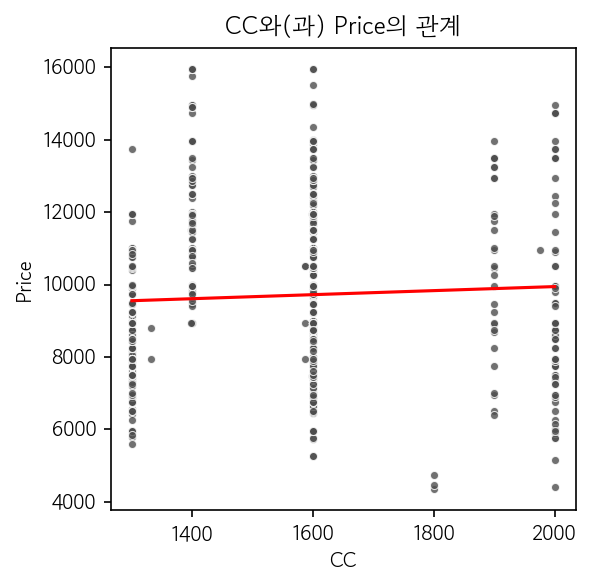

In [23]:
# CC와 Price의 산점도를 그립니다.
hds.plot.regline(data = df, x = 'CC', y = 'Price')

3    569
4    128
5    571
Name: Doors, dtype: int64

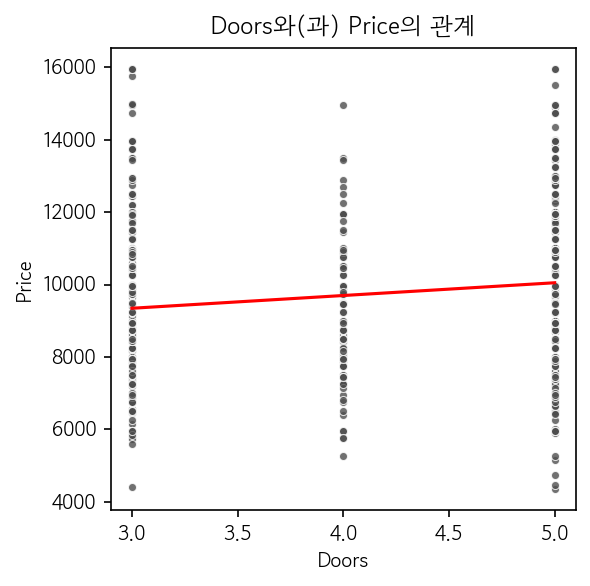

In [24]:
# Doors와 Price의 산점도를 그립니다.
hds.plot.regline(data = df, x = 'Doors', y = 'Price')

# Doors 원소별 빈도수를 확인합니다.
df['Doors'].value_counts().sort_index()

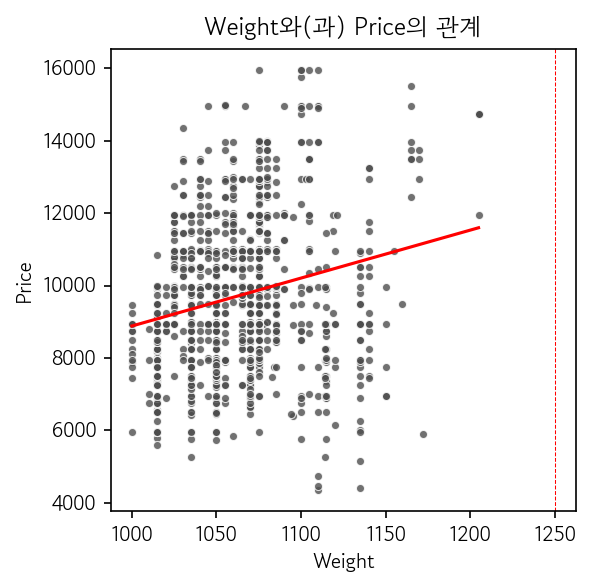

In [25]:
# Weight와 Price의 산점도를 그립니다.
hds.plot.regline(data = df, x = 'Weight', y = 'Price')

# 세로선을 추가합니다.
plt.axvline(x = 1250, color = 'red', lw = 0.5, ls = '--');

### 범주형 입력변수와 관계 파악

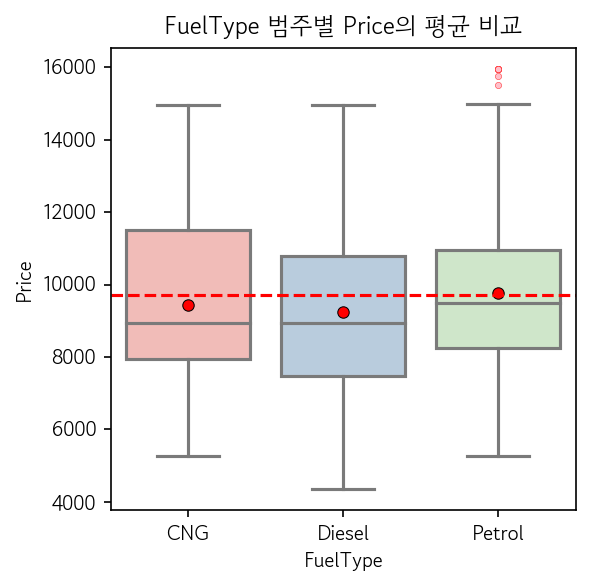

In [26]:
# FuelType 범주별 Price의 상자 수염 그림을 그립니다.
hds.plot.box_group(data = df, x = 'FuelType', y = 'Price', pal = 'Pastel1')

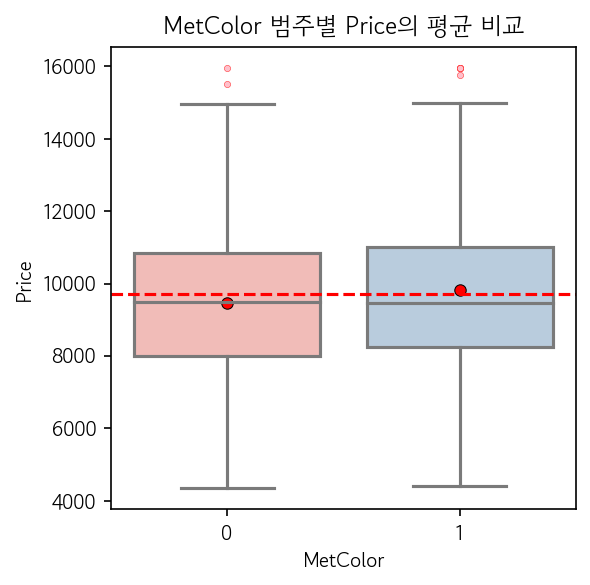

In [27]:
# MetColor 범주별 Price의 상자 수염 그림을 그립니다.
hds.plot.box_group(data = df, x = 'MetColor', y = 'Price', pal = 'Pastel1')

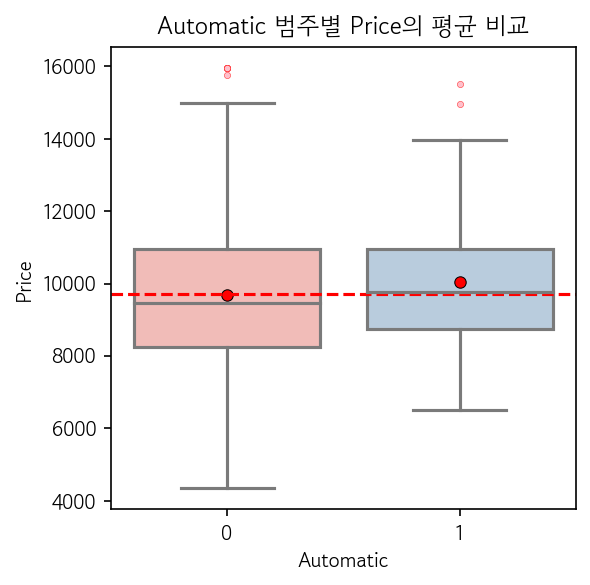

In [28]:
# Automatic 범주별 Price의 상자 수염 그림을 그립니다.
hds.plot.box_group(data = df, x = 'Automatic', y = 'Price', pal = 'Pastel1')

### 불필요한 행 삭제

In [29]:
# 시각화 결과 불필요하다고 판단하는 일부 행을 삭제합니다.
df = df[df['Doors'].ne(2) & df['Weight'].le(1250)]

In [30]:
# df의 행이름을 초기화합니다.
df = df.reset_index(drop = True)

In [31]:
# df의 행 개수를 확인합니다.
df.shape[0]

1268

### 외부 파일로 저장

In [32]:
# df를 z 파일로 저장합니다.
joblib.dump(value = df, filename = 'Used_Cars_Price.z')

['Used_Cars_Price.z']

## End of Document